# Aufgaben Blatt 4 KI Machine Learning I



## Aufgabe 1 (Lineare Regression)

Bearbeiten Sie die Aufgabe https://github.com/oduerr/ki/blob/main/linear_regression/lr_gradient_descent.ipynb

Versuchen Sie den Code zu verstehen und machen die kleineren Aufgaben, die in dem notebook besprochen werden.

## Aufgabe 2 (Titanic)
In dieser Aufgabe nehmen Sie an der Titanic Challenge (https://www.kaggle.com/c/titanic) teil. Sie können die Aufgabe am eigenen PC lösen oder direkt in Kaggle lösen. Die Daten liegen auch auf Moodle. 

a) Lesen Sie die Trainingsdaten ein und teilen Sie sie in ein Validierungsdatenset (20%) und in ein eigentliches Trainigsdatenset (80%) auf. Finden Sie auf dem Trainigsdatenset eine Regel für das Überleben alleine aufgrund der Klasse des Tickets (Pclass). Wenden Sie diese Regel auf die Validierungsdaten an. Wie gut ist die Genauigkeit (Anteil der korrekten Klassifikationen) auf den Validierungsdaten?  

In [171]:
# Hinweise zum Einlesen
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
train_val = pd.read_csv('titanic/train.csv')

# Hinweise zum Erzeugen einer Tabelle
# pd.crosstab(...)

# Hinweise um die Accuracy zu berechnen
from sklearn.metrics import accuracy_score

In [172]:
from sklearn.model_selection import train_test_split

training_set, validation_set = train_test_split(train_val, test_size=0.2)

## wer hat überlebt [amount, survived, ratio]
classes = {
    1: [0, 0, 0],
    2: [0, 0, 0],
    3: [0, 0, 0]
}

for person in training_set.itertuples(index=False):
    p_class = person[2]
    classes[p_class][0] += 1
    classes[p_class][1] += person[1]

for p_class, value in classes.items():
    total = value[0]
    survived = value[1]
    ratio = survived / total if total != 0 else 0
    classes[p_class][2] = ratio
    print(f"Klasse {p_class}: {survived: >3} von {total: >3} überlebt ({ratio * 100:.3f}%)")




Klasse 1: 115 von 176 überlebt (65.341%)
Klasse 2:  69 von 143 überlebt (48.252%)
Klasse 3: 100 von 393 überlebt (25.445%)


In [173]:
## Vorhersage

import random
val_predictions = []
for passenger in validation_set.itertuples(index=False):
    predicted_survival = 1 if random.random() < classes[passenger[2]][2] else 0
    val_predictions.append(predicted_survival)

correct_predictions = validation_set['Survived'] == val_predictions
print(f"Vorhersagen: {sum(correct_predictions)}")
accuracy = sum(correct_predictions) / len(correct_predictions)
print("Genauigkeit:", accuracy)


original_test_set = pd.read_csv("titanic/test.csv")

val_predictions = []
for passenger in original_test_set.itertuples():
    predicted_survival = 1 if random.random() < classes[passenger[2]][2] else 0
    val_predictions.append(predicted_survival)

output = pd.DataFrame({'PassengerId': original_test_set["PassengerId"], 'Survived': val_predictions})
output.to_csv('my_submission.csv', index=False)

Vorhersagen: 99
Genauigkeit: 0.553072625698324


b) Wenden Sie die Regel aus a) auf die Testdaten an und laden Sie Ihre Lösung hoch. 

In [174]:
# 0.56689 war das Ergebnis

c) Logistische Regression mit Pclass

Trainieren Sie eine logistische Regression mit den Variablen 'Pclass'. Verwenden Sie die Klasse `sklearn.linear_model.LogisticRegression`. Berechnen Sie die Accuracy auf dem Validierungsset.

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logReg = LogisticRegression()
logReg.fit(training_set[["Pclass"]], training_set[["Survived"]])

prediction = logReg.predict(validation_set[["Pclass"]])

accuracy = accuracy_score(validation_set[["Survived"]], prediction)
print(f"Genauigkeit: {accuracy * 100:.3f}%")

print(logReg.score(validation_set[["Pclass"]], validation_set[["Survived"]]))

Genauigkeit: 68.715%
0.6871508379888268


c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


d) Coding / Feature engineering 

d.i) Missing Values:

Verwenden Sie nun weitere Features. Die Variable Age enthält Missing values, die Sie durch folgenden code ersetzen können (was passiert da?)

In [176]:
validation_set.fillna({"Age" :training_set["Age"].median(skipna=True)}, inplace=True)
training_set["Age"].fillna(training_set["Age"].median(skipna=True), inplace=True)

C:\Users\jonas\AppData\Local\Temp\ipykernel_15452\2372068315.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_set["Age"].fillna(training_set["Age"].median(skipna=True), inplace=True)


The missing values of 'Age' are getting replaced by the median values of 'Age' from the training_set

d.ii) Kategorische Variable

Verwenden Sie die Funktion `pd.get_dummies` um die Variablen 'Pclass' and 'Sex' in numerische Werte umzuwandeln. Führen Sie nun eine logistische Regression durch.

In [177]:
df = pd.get_dummies(training_set, columns=["Pclass", "Sex"])

logReg = LogisticRegression()
X = df[['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Sex_female']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit des Modells: {accuracy*100:.2f}%')



Genauigkeit des Modells: 76.92%


e) Weitere Klassifikatoren. Neben der logistischen Regression, gibt es weitere Klassifikatoren. Der Random-Forest ist ein recht stabiler Klassifikator, was wäre die Performance von diesem Klassifikator.

In [178]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit des Modells: {accuracy*100:.2f}%')


Genauigkeit des Modells: 76.92%


f) [optional] Versuchen Sie weitere Features zu erzeugen und laden den besten Klassifikator auf Kaggle hoch. 

## Aufgabe 3 Titanic mit Neuronalen Netzen 

Hinweis: Diese Aufgabe kann erst nach der dritten Vorlesung in ML gemacht werden.

Mit den gleichen Daten, wie in der Aufgabe 2 d. Erstellen Sie ein fully connected neural network und fitten es an die Ttrainingsdaten. Verwenden Sie mindestens zwei hidden Layer. Plotten Sie den Verlauf der Loss Kurve für die Trainings- und Validierungsdaten. Optional: Laden Sie Ihre beste Lösung auf Kaggle hoch. 

In [179]:
#Sie können von folgendem Code starten um das Netzwerk zu definieren, füllen Sie die ...
import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(..., activation='sigmoid', batch_input_shape=(None, 4))) #We have 4 input features
#...
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150


/var/folders/lr/n_w7l2nn1klg5pbt8vrzdt7m0000gn/T/ipykernel_88745/186212899.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
/Users/felixfischer/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=acti

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5471 - loss: 0.8487 - val_accuracy: 0.5866 - val_loss: 0.6775
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5091 - loss: 0.6867 - val_accuracy: 0.5866 - val_loss: 0.6733
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6229 - loss: 0.6669 - val_accuracy: 0.5866 - val_loss: 0.6727
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6255 - loss: 0.6581 - val_accuracy: 0.5866 - val_loss: 0.6659
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6174 - loss: 0.6722 - val_accuracy: 0.6145 - val_loss: 0.6591
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6214 - loss: 0.6657 - val_accuracy: 0.6034 - val_loss: 0.6514
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6462 - loss: 0.6464 - val_accuracy: 0.6257 - val_loss: 0.6347
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6482 - loss: 0.6316 - val_accuracy: 0.6145 - val_loss: 0.

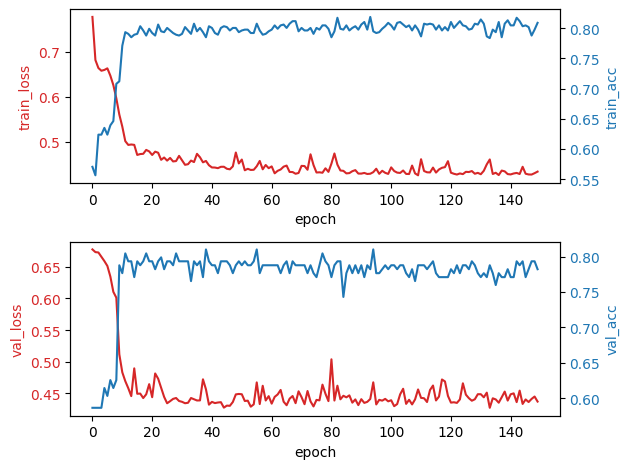

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow_history_plot import show_acc

train_data = pd.read_csv("titanic/train.csv")
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True) 

features = ["Pclass", "Survived", "Sex", "Age"]
train_data = pd.get_dummies(train_data[features])

X = train_data.drop('Survived', axis=1, inplace=False)
y = train_data['Survived']

X_train, X_val, y_train,y_val  = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.asarray(X_train).astype('float32')
X_val = np.asarray(X_val).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')


model = Sequential()
model.add(Dense(800, activation='sigmoid',input_shape=(4,), name="Layer_1"))
model.add(Dense(800, activation='sigmoid', name="Layer_2"))
model.add(Dense(800, activation='sigmoid', name="Layer_3"))
model.add(Dense(1, activation='sigmoid', name="Layer_4"))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])

# model.summary()


history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=150,
                    batch_size=50)

show_acc.plot(history)